In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

tess_object = pd.read_csv("TESS Objects of Interest.csv",
                          sep=",",
                          comment="#",
                          engine="python",
                          on_bad_lines="skip")
print(tess_object.shape)
print(tess_object.info())

(7668, 65)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   toi              7668 non-null   float64
 1   tid              7668 non-null   int64  
 2   tfopwg_disp      7668 non-null   object 
 3   rastr            7668 non-null   object 
 4   ra               7668 non-null   float64
 5   decstr           7668 non-null   object 
 6   dec              7668 non-null   float64
 7   st_pmra          7534 non-null   float64
 8   st_pmraerr1      7534 non-null   float64
 9   st_pmraerr2      7534 non-null   float64
 10  st_pmralim       7534 non-null   float64
 11  st_pmdec         7534 non-null   float64
 12  st_pmdecerr1     7534 non-null   float64
 13  st_pmdecerr2     7534 non-null   float64
 14  st_pmdeclim      7534 non-null   float64
 15  pl_tranmid       7668 non-null   float64
 16  pl_tranmiderr1   7657 non-null   float64
 17  pl_

In [2]:
tess_object.isnull().sum()[tess_object.isnull().sum() > 0]

st_pmra             134
st_pmraerr1         134
st_pmraerr2         134
st_pmralim          134
st_pmdec            134
st_pmdecerr1        134
st_pmdecerr2        134
st_pmdeclim         134
pl_tranmiderr1       11
pl_tranmiderr2       11
pl_orbper           106
pl_orbpererr1       130
pl_orbpererr2       130
pl_trandurherr1      13
pl_trandurherr2      13
pl_trandeperr1        6
pl_trandeperr2        6
pl_rade             504
pl_radeerr1        1621
pl_radeerr2        1621
pl_insol            176
pl_insolerr1       7668
pl_insolerr2       7668
pl_insollim        7668
pl_eqt              311
pl_eqterr1         7668
pl_eqterr2         7668
pl_eqtlim          7668
st_dist             215
st_disterr1         706
st_disterr2         706
st_teff             161
st_tefferr1         473
st_tefferr2         473
st_logg             856
st_loggerr1        2257
st_loggerr2        2257
st_rad              505
st_raderr1         1950
st_raderr2         1950
dtype: int64

In [3]:
drop_cols = ['pl_insolerr1','pl_insolerr2','pl_insollim','pl_eqterr1','pl_eqterr2','pl_eqtlim']
tess_object.drop(drop_cols,inplace=True,axis=1)
print(tess_object.isnull().sum())

toi                   0
tid                   0
tfopwg_disp           0
rastr                 0
ra                    0
decstr                0
dec                   0
st_pmra             134
st_pmraerr1         134
st_pmraerr2         134
st_pmralim          134
st_pmdec            134
st_pmdecerr1        134
st_pmdecerr2        134
st_pmdeclim         134
pl_tranmid            0
pl_tranmiderr1       11
pl_tranmiderr2       11
pl_tranmidlim         0
pl_orbper           106
pl_orbpererr1       130
pl_orbpererr2       130
pl_orbperlim          0
pl_trandurh           0
pl_trandurherr1      13
pl_trandurherr2      13
pl_trandurhlim        0
pl_trandep            0
pl_trandeperr1        6
pl_trandeperr2        6
pl_trandeplim         0
pl_rade             504
pl_radeerr1        1621
pl_radeerr2        1621
pl_radelim            0
pl_insol            176
pl_eqt              311
st_tmag               0
st_tmagerr1           0
st_tmagerr2           0
st_tmaglim            0
st_dist         

In [4]:
error_cols = ['st_raderr1','st_raderr2','st_loggerr1','st_loggerr2','st_tefferr1','st_tefferr2',
              'st_disterr1','st_disterr2','st_tmagerr1','st_tmagerr2','pl_radeerr1','pl_radeerr2',
              'pl_trandeperr1','pl_trandeperr2','pl_trandurherr1','pl_trandurherr2','pl_orbpererr1',
              'pl_orbpererr2','pl_tranmiderr1','pl_tranmiderr2','st_pmdecerr1','st_pmdecerr2',
              'st_pmraerr1','st_pmraerr2']
for col in error_cols:
    tess_object.drop(col,inplace=True,axis=1)
print(tess_object.isnull().sum())

toi                 0
tid                 0
tfopwg_disp         0
rastr               0
ra                  0
decstr              0
dec                 0
st_pmra           134
st_pmralim        134
st_pmdec          134
st_pmdeclim       134
pl_tranmid          0
pl_tranmidlim       0
pl_orbper         106
pl_orbperlim        0
pl_trandurh         0
pl_trandurhlim      0
pl_trandep          0
pl_trandeplim       0
pl_rade           504
pl_radelim          0
pl_insol          176
pl_eqt            311
st_tmag             0
st_tmaglim          0
st_dist           215
st_distlim          0
st_teff           161
st_tefflim          0
st_logg           856
st_logglim          0
st_rad            505
st_radlim           0
toi_created         0
rowupdate           0
dtype: int64


In [5]:
limit_cols = ['st_pmralim','st_pmdeclim','pl_tranmidlim','pl_orbperlim','pl_trandurhlim',
                'pl_trandeplim','pl_radelim','st_tmaglim','st_distlim','st_tefflim','st_logglim',
                'st_radlim']
for col in limit_cols:
    tess_object.drop(col,inplace=True,axis=1)
print(tess_object.isnull().sum())

toi              0
tid              0
tfopwg_disp      0
rastr            0
ra               0
decstr           0
dec              0
st_pmra        134
st_pmdec       134
pl_tranmid       0
pl_orbper      106
pl_trandurh      0
pl_trandep       0
pl_rade        504
pl_insol       176
pl_eqt         311
st_tmag          0
st_dist        215
st_teff        161
st_logg        856
st_rad         505
toi_created      0
rowupdate        0
dtype: int64


<Axes: xlabel='st_pmra', ylabel='Count'>

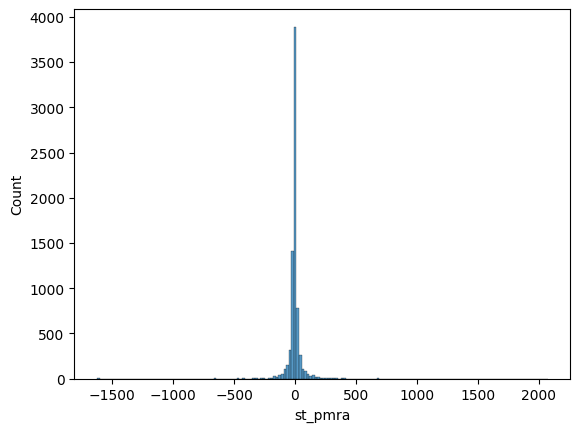

In [6]:
sb.histplot(x='st_pmra',data=tess_object)

<Axes: xlabel='st_pmdec', ylabel='Count'>

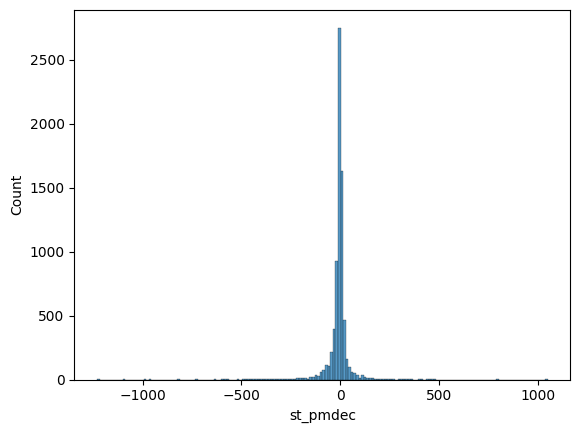

In [7]:
sb.histplot(x="st_pmdec",data=tess_object)

<Axes: xlabel='pl_orbper', ylabel='Count'>

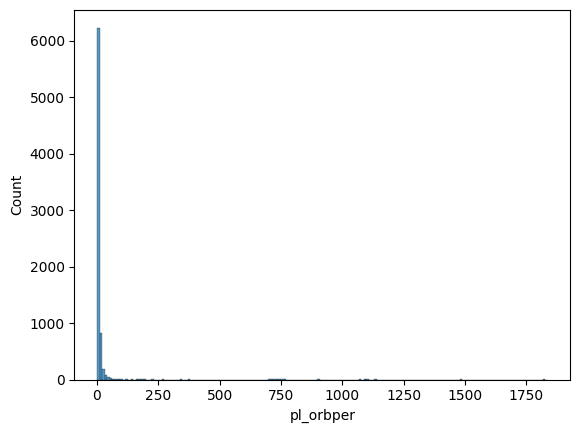

In [8]:
sb.histplot(x="pl_orbper",data=tess_object)

<Axes: xlabel='pl_trandurh', ylabel='Count'>

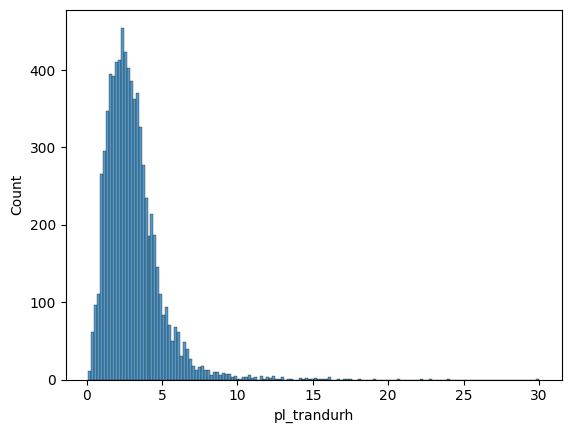

In [9]:
sb.histplot(x="pl_trandurh",data=tess_object)


<Axes: xlabel='pl_trandep', ylabel='Count'>

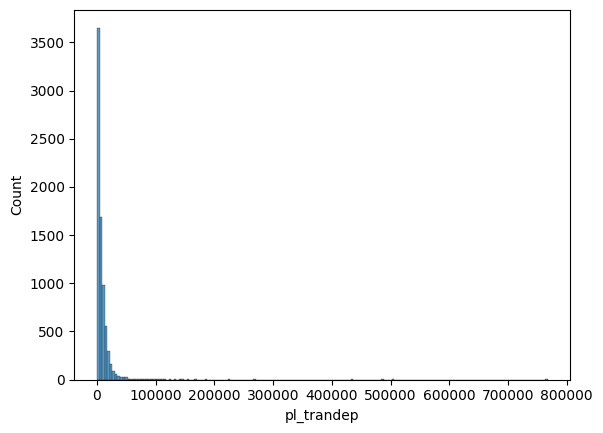

In [10]:
sb.histplot(x="pl_trandep",data=tess_object)

<Axes: xlabel='pl_rade', ylabel='Count'>

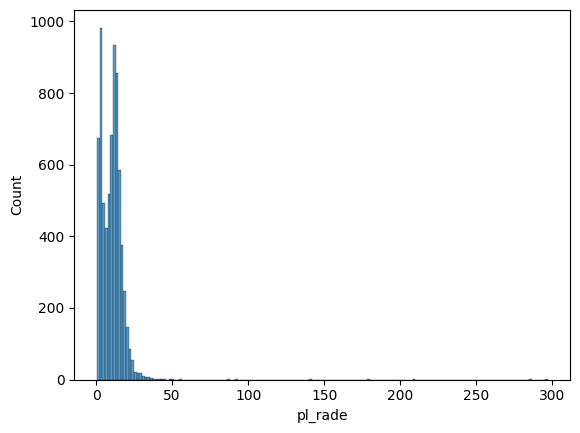

In [11]:
sb.histplot(x="pl_rade",data=tess_object)

<Axes: xlabel='pl_insol', ylabel='Count'>

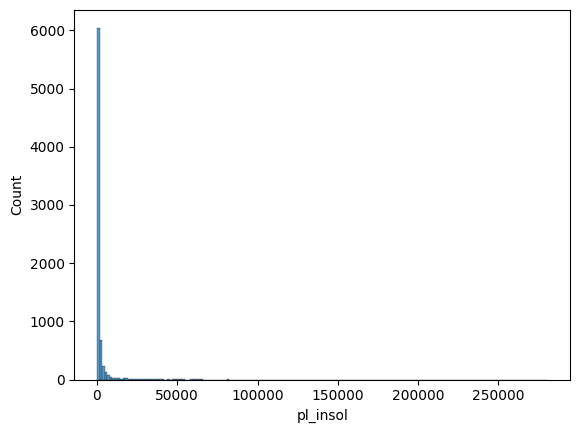

In [12]:
sb.histplot(x="pl_insol",data=tess_object)

<Axes: xlabel='pl_eqt', ylabel='Count'>

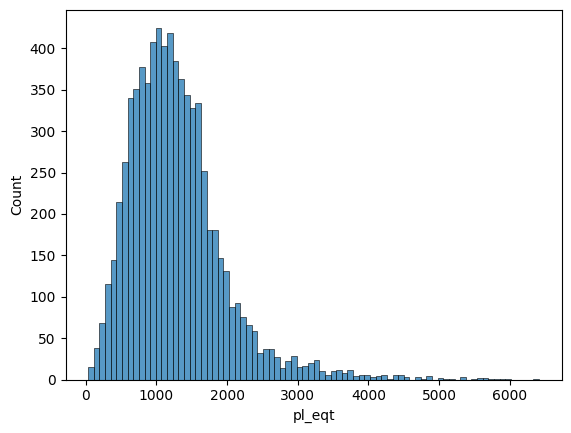

In [13]:
sb.histplot(x="pl_eqt",data=tess_object)

<Axes: xlabel='st_dist', ylabel='Count'>

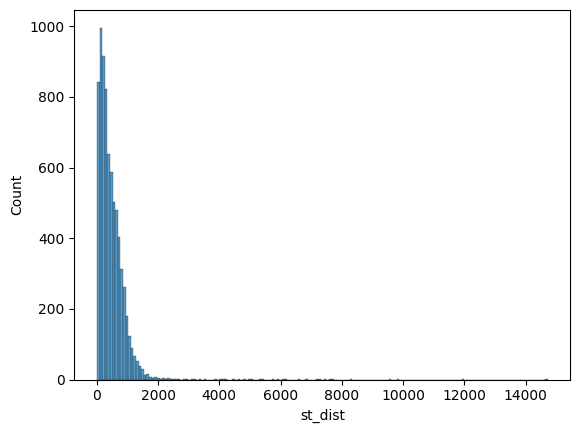

In [14]:
sb.histplot(x="st_dist",data=tess_object)

<Axes: xlabel='st_teff', ylabel='Count'>

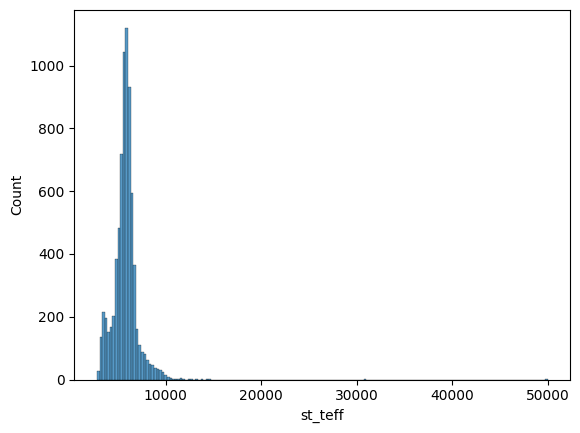

In [15]:
sb.histplot(x="st_teff",data=tess_object)

<Axes: xlabel='st_teff', ylabel='Count'>

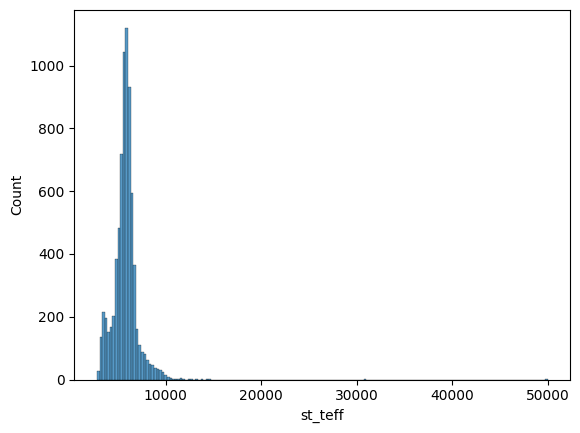

In [16]:
sb.histplot(x="st_teff",data=tess_object)

<Axes: xlabel='st_logg', ylabel='Count'>

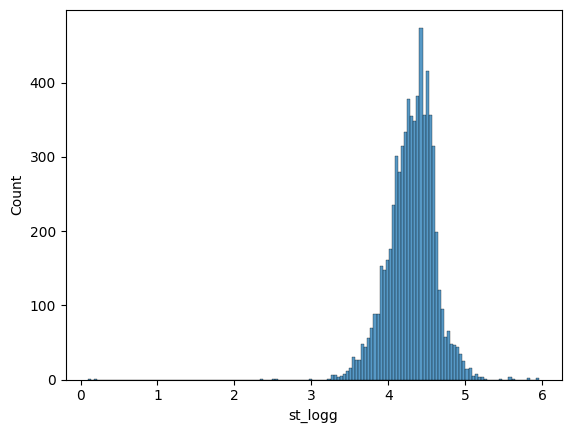

In [17]:
sb.histplot(x="st_logg",data=tess_object)

<Axes: xlabel='st_rad', ylabel='Count'>

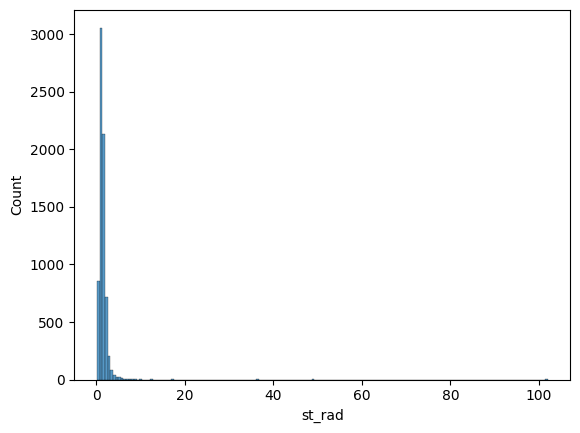

In [18]:
sb.histplot(x="st_rad",data=tess_object)

In [19]:
missing_cols = ['st_pmra','st_pmdec','pl_orbper','pl_rade','pl_insol','pl_eqt',
                'st_dist','st_teff','st_logg','st_rad']
for col in missing_cols:
    tess_object[col].fillna(tess_object[col].median(),inplace=True)
print(tess_object.isnull().sum())

toi            0
tid            0
tfopwg_disp    0
rastr          0
ra             0
decstr         0
dec            0
st_pmra        0
st_pmdec       0
pl_tranmid     0
pl_orbper      0
pl_trandurh    0
pl_trandep     0
pl_rade        0
pl_insol       0
pl_eqt         0
st_tmag        0
st_dist        0
st_teff        0
st_logg        0
st_rad         0
toi_created    0
rowupdate      0
dtype: int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9788\3246650251.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tess_object[col].fillna(tess_object[col].median(),inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9788\3246650251.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [20]:
tess_object['tfopwg_disp'] = tess_object['tfopwg_disp'].replace({
    'CP': 'CONFIRMED',
    'KP': 'CONFIRMED',
    'PC': 'CANDIDATE',
    'FP': 'FALSE POSITIVE',
    'APC': 'ACTIVE PLANET CANDIDATE',
    'FA':'FALSE ALARM'
})
print(tess_object['tfopwg_disp'].unique().tolist())

['FALSE POSITIVE', 'CANDIDATE', 'CONFIRMED', 'ACTIVE PLANET CANDIDATE', 'FALSE ALARM']


In [21]:
G = 6.674e-8       
R_sun_cm = 6.957e10 
M_sun_g = 1.989e33  

g_cgs = 10 ** tess_object['st_logg']

R_star_cm = tess_object['st_rad'] * R_sun_cm

M_star_g = g_cgs * (R_star_cm ** 2) / G

tess_object['stellar_mass'] = M_star_g / M_sun_g

print(tess_object[['st_rad', 'st_logg', 'stellar_mass']].head())


    st_rad  st_logg  stellar_mass
0  2.16986     4.19      2.658805
1  2.01000     4.03      1.578393
2  5.73000     4.33     25.593652
3  1.23975     4.15      0.791574
4  2.15000     4.14      2.326483


In [22]:
print(tess_object.columns.tolist())

['toi', 'tid', 'tfopwg_disp', 'rastr', 'ra', 'decstr', 'dec', 'st_pmra', 'st_pmdec', 'pl_tranmid', 'pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_dist', 'st_teff', 'st_logg', 'st_rad', 'toi_created', 'rowupdate', 'stellar_mass']


In [23]:
tess_object.to_csv("TOI_cleaned.csv",index=False)